In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
%matplotlib inline

Set locations

In [2]:
DATA_LOCATION = '../data/'
TEST_IMAGES_LOCATION = '../data/test_images/'
TRAIN_IMAGES_LOCATION = '../data/train_images/'

# Import data

### Label mapping

In [3]:
label_map = pd.read_csv(DATA_LOCATION + 'label_map.txt', sep=' ', names=['class_name','class_nr'])

In [4]:
label_map.sample(n=10)

,class_name,class_nr
85,ephyra,85
43,unknown_blobs_and_smudges,43
12,protist_other,12
5,hydromedusae_haliscera,5
20,jellies_tentacles,20
70,echinoderm_larva_seastar_brachiolaria,70
22,copepod_calanoid_large,22
58,chaetognath_other,58
10,heteropod,10
32,diatom_chain_string,32


### Sample data

In [5]:
sample = pd.read_csv(DATA_LOCATION + 'sample.csv', names=['image','class_nr'], header=0)

In [6]:
sample.sample(n=10)

,image,class_nr
3380,144814.jpg,0
4811,42134.jpg,0
930,46265.jpg,0
748,59578.jpg,0
1425,123707.jpg,0
991,64348.jpg,0
3637,11534.jpg,0
5526,47187.jpg,0
663,67127.jpg,0
2291,147104.jpg,0


### Train data

In [3]:
train_labels = pd.read_csv(DATA_LOCATION + 'train_onelabel.csv')

In [4]:
train_labels.sample(n=10)

,image,class
8658,80469.jpg,36
1085,134367.jpg,3
13016,8018.jpg,58
17835,118573.jpg,84
7167,40993.jpg,31
22534,78283.jpg,111
12459,49217.jpg,58
17131,147657.jpg,84
7438,98429.jpg,32
20005,127073.jpg,100


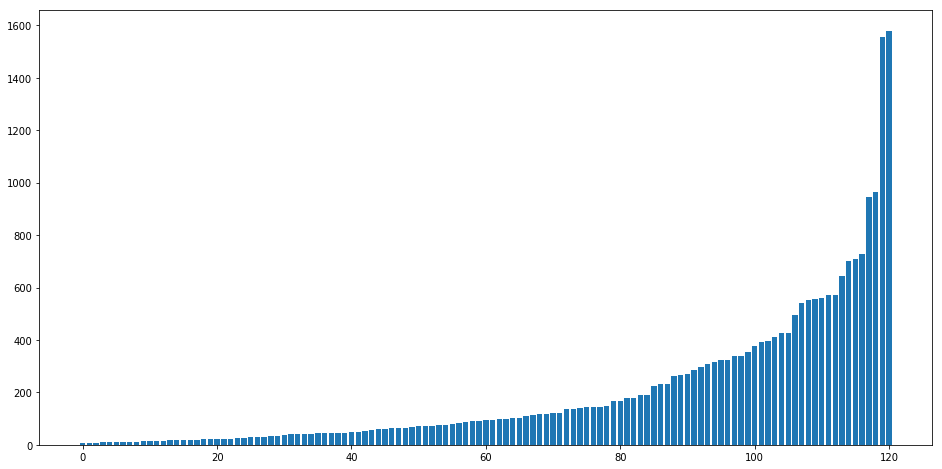

In [13]:
counts = train_labels.groupby('class').count().astype('int').sort_values('image')['image'].values.tolist()
plt.figure(figsize=(16,8))
plt.bar(range(len(counts)), counts)
plt.show()

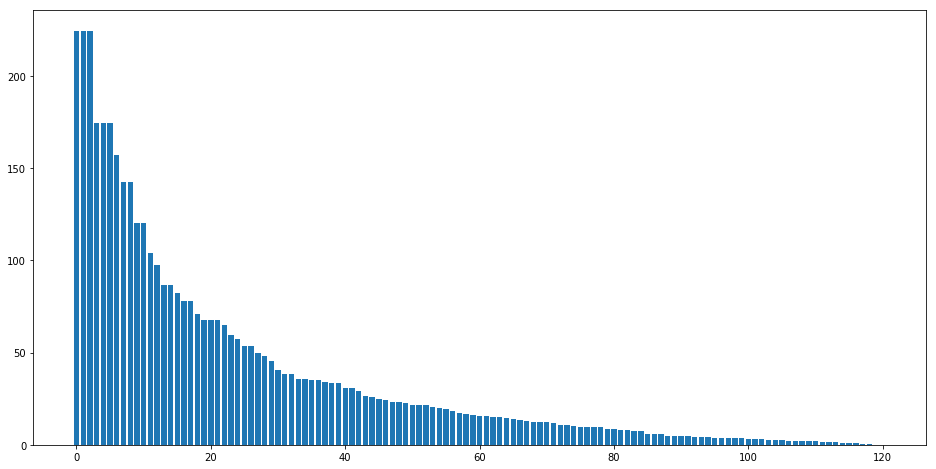

In [14]:
# the number of times the images in a class need to be added in order to balance items per class
times = []
for count in counts:
    times.append((1580 - count)/count)
plt.figure(figsize=(16,8))
plt.bar(range(len(times)), times)
plt.show()

## The actual images

Show a random image from the training set

In [9]:
def get_image(filepath):
    """
    Load image from filepath to a numpy.ndarray
    input:
        - filepath: string with relative or absolute path to image
    output:
        - img:
            numpy.ndarray containing the image
            shaped (M,N), values [0.0, 1.0]
    """
    try:
        img = TRAIN_IMAGES_LOCATION + filepath
        img = mpimg.imread(img)
    except:
        img = filepath
        img = mpimg.imread(img)
    img = np.absolute(np.divide(img.astype(float), 255) - 1.0)
    return img

def show_image(filepath):
    """
    Show the image through Matplotlib
    input:
        - filepath: string with relative or absolute path to image
    output:
        - None
    """
    img = get_image(filepath)
    plt.imshow(img,cmap='binary')

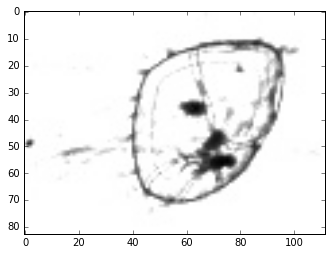

In [12]:
# show a random image from the train set
show_image(train_labels.sample(n=1).iloc[0]['image'])

## Making images square and resizing to consistent shape

In [90]:
def get_padding(i):
    """
    Helper function for getting right padding sizes
    input:
        - i: positive integer gotten from substracting height and width of an image
    output:
        - Tuple representing the correct padding
    """
    if i%2 == 0:
        return (int(i/2),int(i/2))
    else:
        return (int(i/2-.5), int(i/2+.5))

    
def pad_image(image_path):
    """
    Add padding to image to make it square
    input:
        - image_path: string path of image
    output:
        - padded array of shape (N,N)
    """
    H, W = get_image(image_path).shape
    array = get_image(image_path)
    if H == W:
        return array
    elif H > W:
        return np.pad(array, ((0,0), get_padding(H-W)), 'constant')
    else:
        return np.pad(array, (get_padding(W-H), (0,0)), 'constant')
    
def resize_image(img, size):
    """
    Resize image to new square shape
    input:
        - img: numpy array representing image
        - size: final shape of image in pixels (integer)"""
    return resize(img, (size,size), mode='reflect')

In [91]:
# Small sample
squares = [pad_image(TRAIN_IMAGES_LOCATION+train_labels.iloc[i]['image']) for i in range(100)]

Wall time: 499 ms


In [86]:
def show(array):
    plt.imshow(array,cmap='binary')

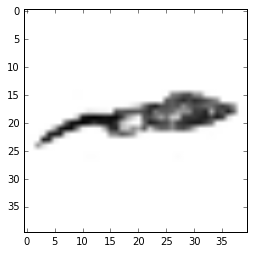

In [85]:
show(resize_image(squares[11], 40))

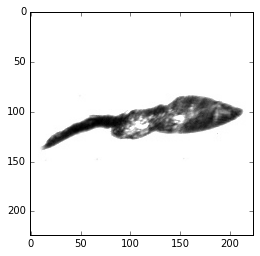

In [74]:
show(squares[11])